## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [18]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [19]:
import pandas as pd

# Load the dataset
customer_set = pd.read_csv("Mall_Customers.csv")

# Rename attributes
customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [20]:
# Check the attributes of the dataset
print("Attributes of the dataset:")
print(customer_set.columns)

# Display the dimensions of the dataset
print("\nDimension of the dataset:")
print(customer_set.shape)

# Display basic statistical information about numerical variables
print("\nBasic statistical information about numerical variables:")
print(customer_set.describe())

# Check for missing values (NaN)
print("\nChecking for missing values:")
print(customer_set.isnull().sum())


Attributes of the dataset:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Dimension of the dataset:
(200, 5)

Basic statistical information about numerical variables:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Checking for missing values:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [21]:
# Remove the 'CustomerID' variable
customer_set = customer_set.drop(columns=['CustomerID'])

# Confirm that the 'CustomerID' variable has been removed
print("Attributes of the dataset after removing 'CustomerID':")
print(customer_set.columns)


Attributes of the dataset after removing 'CustomerID':
Index(['Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

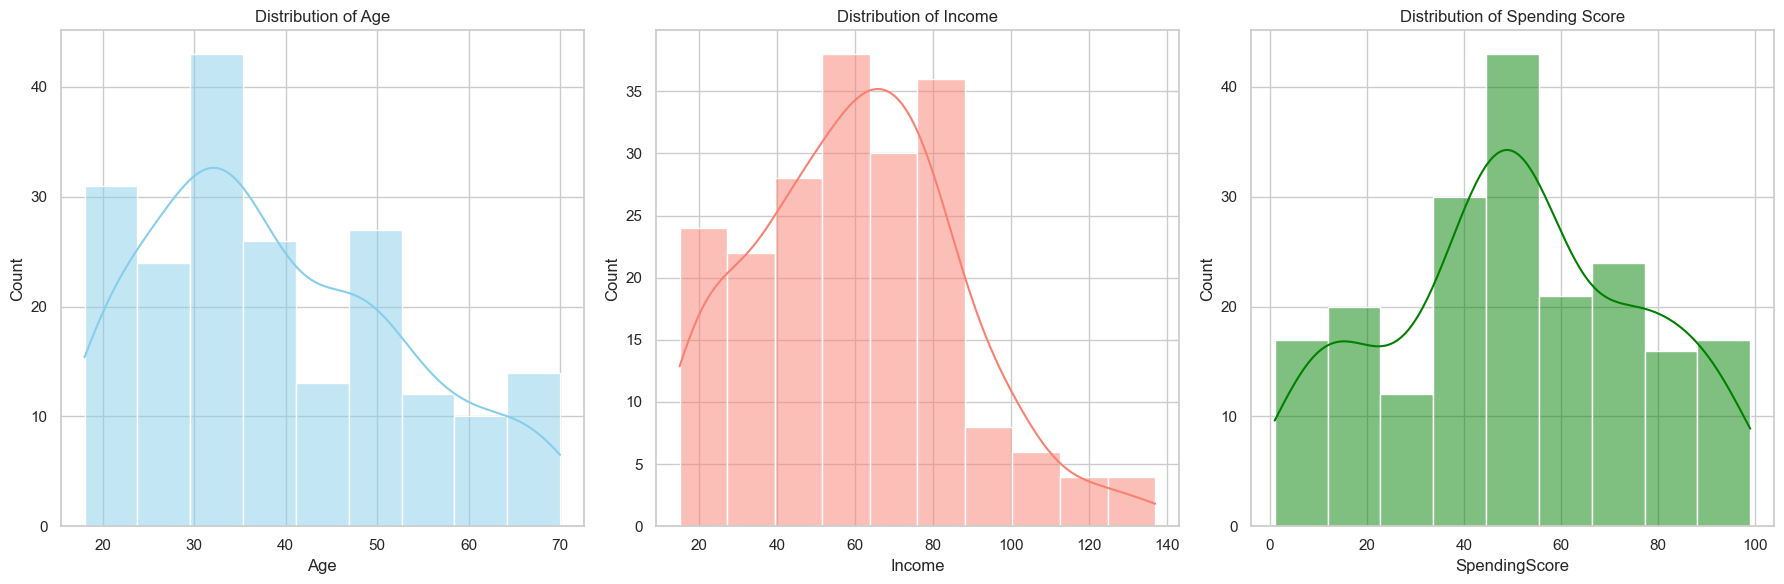

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Set up the figure
plt.figure(figsize=(18, 6))

# Plot histograms for Age, Income, and SpendingScore
plt.subplot(1, 3, 1)
sns.histplot(customer_set['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(customer_set['Income'], kde=True, color='salmon')
plt.title('Distribution of Income')

plt.subplot(1, 3, 3)
sns.histplot(customer_set['SpendingScore'], kde=True, color='green')
plt.title('Distribution of Spending Score')

# Display the plots
plt.tight_layout()
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

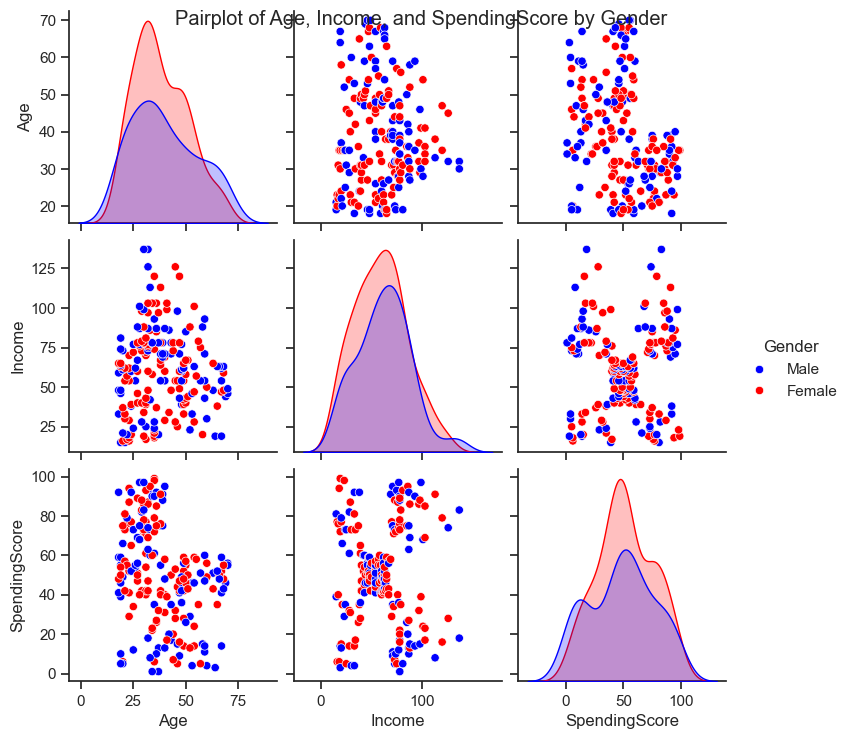

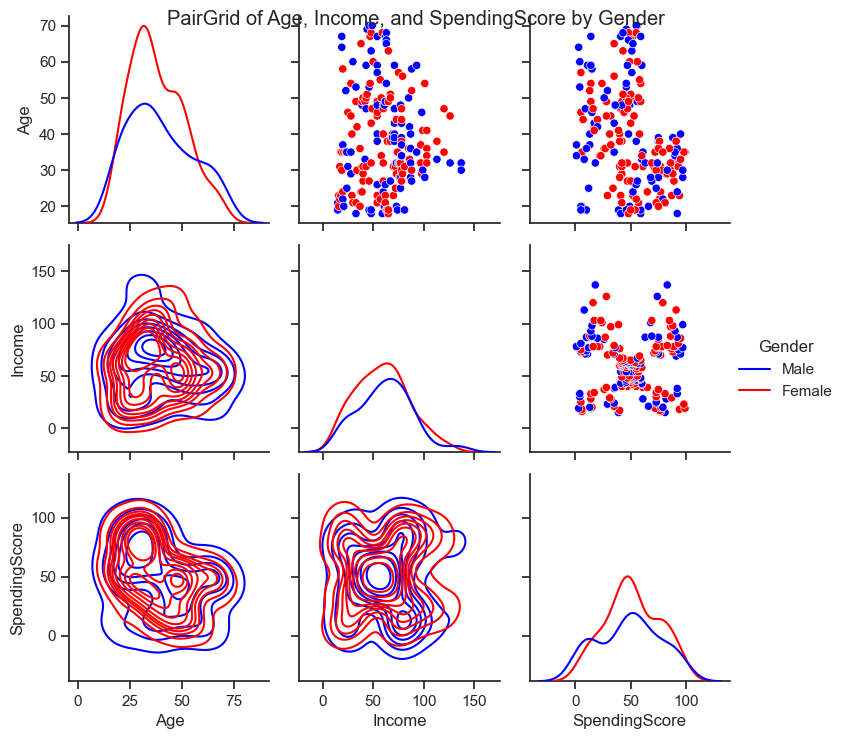

In [23]:
import seaborn as sns

# Set the style of seaborn
sns.set(style="ticks")

# Pairplot for all variables with respect to Gender
sns.pairplot(customer_set, hue='Gender', palette={"Male": "blue", "Female": "red"})
plt.suptitle('Pairplot of Age, Income, and SpendingScore by Gender')
plt.show()

# Pairplot using sns.PairGrid
g = sns.PairGrid(customer_set, hue='Gender', palette={"Male": "blue", "Female": "red"})
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend(title='Gender')
plt.suptitle('PairGrid of Age, Income, and SpendingScore by Gender')
plt.show()


**Висновки з 1-4 завдання (детальні)**

Підготовка даних (Завдання 1):
Датасет "Mall_Customers" було успішно завантажено, і він містить такі атрибути, як CustomerID, Gender, Age, Income та SpendingScore.
Розмір датасету складає 200 рядків і 5 стовпців.
Була отримана базова статистична інформація для числових змінних (Age, Income та SpendingScore), яка включала середнє, стандартне відхилення, мінімальне та максимальне значення, а також квартильні значення.
У датасеті не було пропущених значень (NaN).

Вилучення зайвої змінної (Завдання 2):
Змінна CustomerID визначена як зайвий, оскільки вона не вносить внесок у аналіз.
Отже, змінна CustomerID була вилучена з датасету.

Візуалізація розподілу змінних (Завдання 3):
Побудовані гістограми для візуалізації розподілів Age, Income та SpendingScore.
Розподіл Age виглядав відносно однорідним.
Income показав невелику праву асиметрію, що свідчить про більшу концентрацію осіб з низькими доходами.
Розподіл SpendingScore мав кілька відмінних груп.

Дослідження змінних за статевою ознакою (Завдання 4):
Побудовано парні графіки для дослідження зв'язку між Age, Income та SpendingScore у відношенні до Gender.
У парних графіках візуалізовано розподіл змінних за Gender:
Чоловіки та жінки схожі за розподілом Age.
Розподіл Income та SpendingScore трохи відрізнявся між чоловіками та жінками.
Використання sns.PairGrid дозволило додатково налаштувати парний графік, надавши діаграми розсіювання, ядерні оцінки щільності (KDE) та комбінацію обох для кожної комбінації змінних.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення по статям:
Gender
Female    112
Male       88
Name: count, dtype: int64


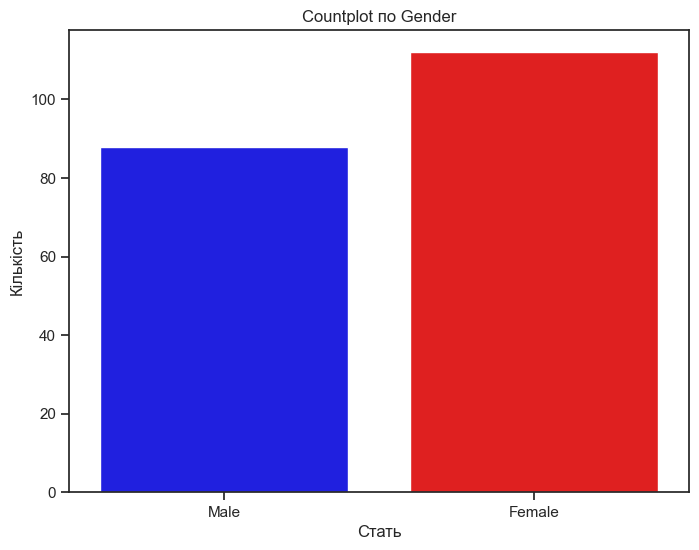

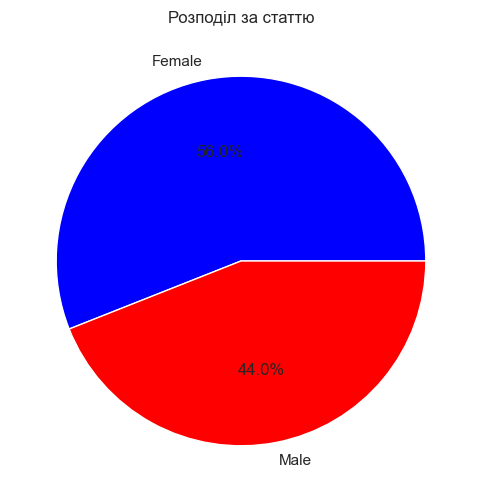

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Виведення співвідношення по статям
gender_counts = customer_set['Gender'].value_counts()
print("Співвідношення по статям:")
print(gender_counts)

# Побудова countplot по Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=customer_set, palette={"Male": "blue", "Female": "red"})
plt.title('Countplot по Gender')
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.show()

# Побудова pie по Gender
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Розподіл за статтю')
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

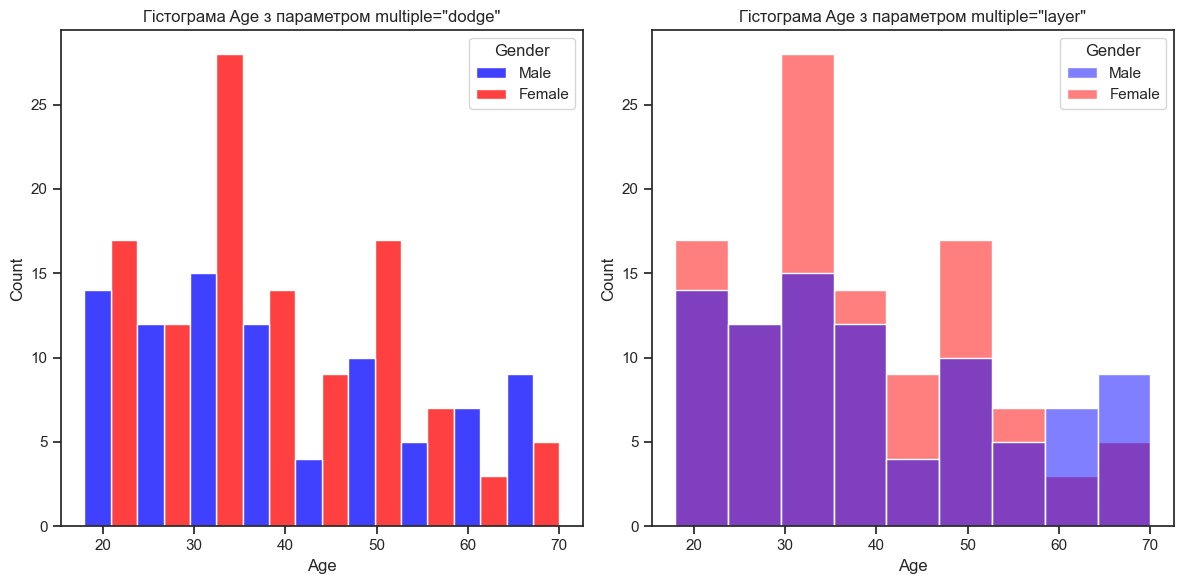

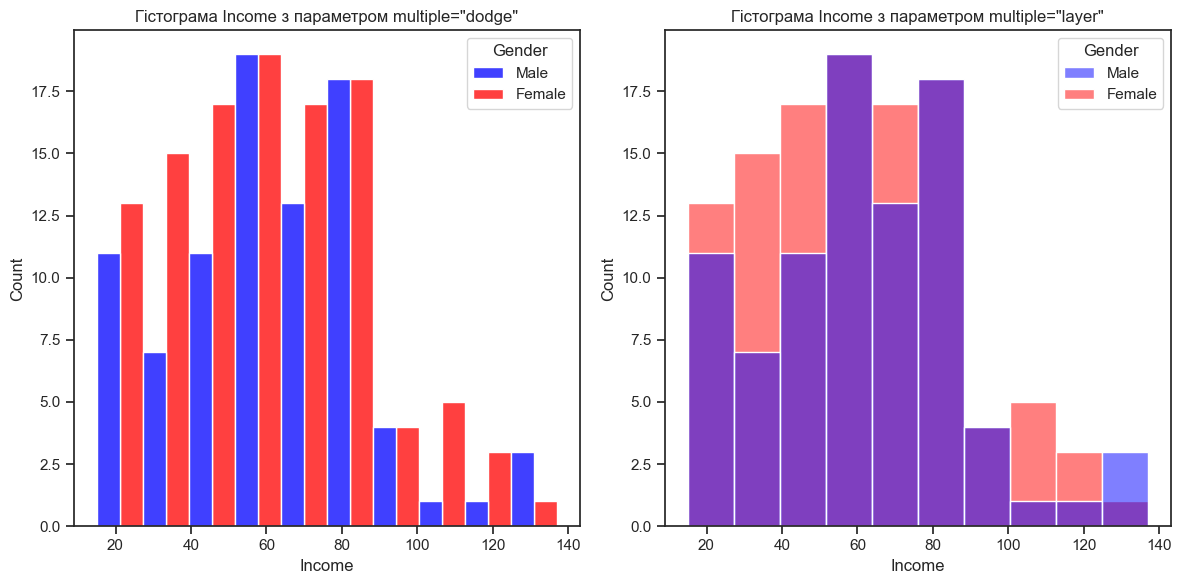

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова гістограм для Age з різними параметрами multiple
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', palette={"Male": "blue", "Female": "red"})
plt.title('Гістограма Age з параметром multiple="dodge"')

plt.subplot(1, 2, 2)
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', palette={"Male": "blue", "Female": "red"})
plt.title('Гістограма Age з параметром multiple="layer"')

plt.tight_layout()
plt.show()

# Побудова гістограм для Income з різними параметрами multiple
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', palette={"Male": "blue", "Female": "red"})
plt.title('Гістограма Income з параметром multiple="dodge"')

plt.subplot(1, 2, 2)
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', palette={"Male": "blue", "Female": "red"})
plt.title('Гістограма Income з параметром multiple="layer"')

plt.tight_layout()
plt.show()


**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



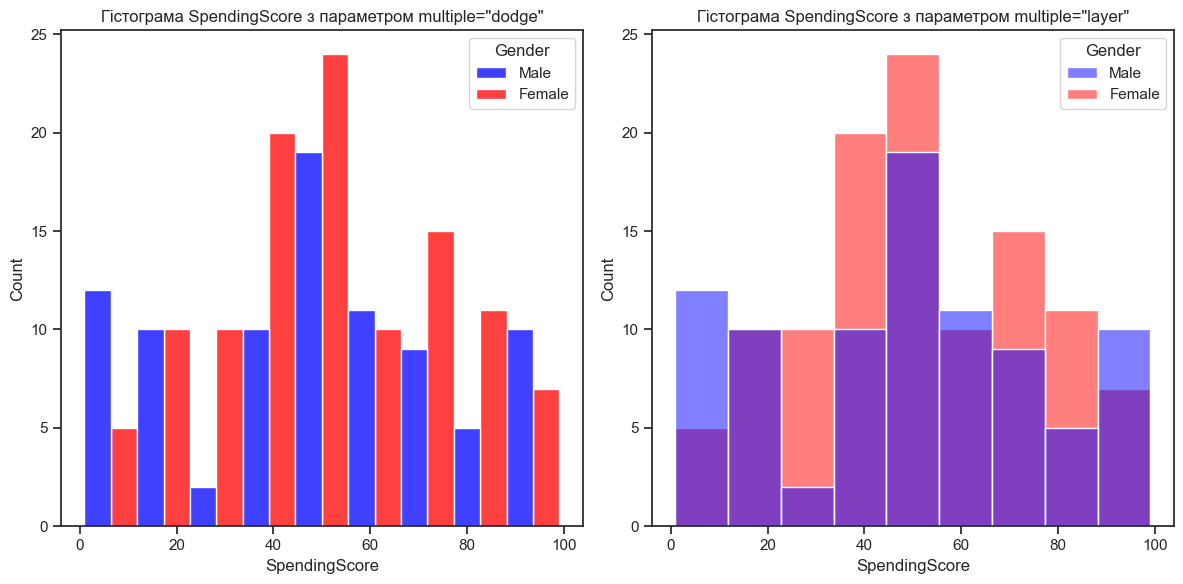

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова гістограм для SpendingScore з різними параметрами multiple
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', palette={"Male": "blue", "Female": "red"})
plt.title('Гістограма SpendingScore з параметром multiple="dodge"')

plt.subplot(1, 2, 2)
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', palette={"Male": "blue", "Female": "red"})
plt.title('Гістограма SpendingScore з параметром multiple="layer"')

plt.tight_layout()
plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

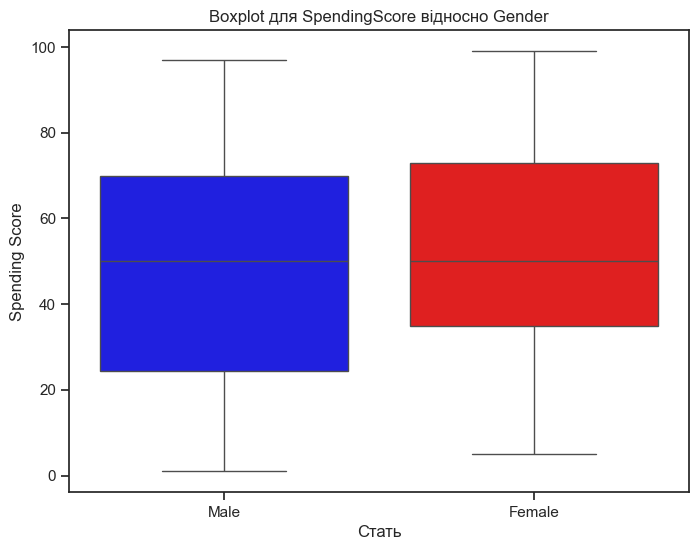

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова boxplot для SpendingScore відносно Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set, palette={"Male": "blue", "Female": "red"})
plt.title('Boxplot для SpendingScore відносно Gender')
plt.xlabel('Стать')
plt.ylabel('Spending Score')
plt.show()


**Висновки з завдання 5 - 8(детальні)**

Співвідношення груп чоловіків та жінок (Завдання 5):
За даними змінної Gender, можна побачити, що кількість жінок (Female) у датасеті перевищує кількість чоловіків (Male).

Виділення груп та розподіл витрат відносно статі (Завдання 6-8):
Під час аналізу гістограм (histplot) для змінних Age, Income та SpendingScore відносно змінної Gender, ми помітили, що розподіл цих змінних трохи відрізняється в залежності від статі.
За результатами boxplot для змінної SpendingScore відносно Gender, видно, що медіана та розмах витрат можуть відрізнятись між чоловіками та жінками.
Гістограми та boxplot показують, що можна виділити деякі групи за рівнем витрат у чоловіків та жінок. Наприклад, можна помітити, що середні витрати можуть бути вищими серед однієї з груп.

Різниця між витратами у чоловіків та жінок (Завдання 8):
Є певна різниця між витратами у чоловіків та жінок, що видно з аналізу гістограм та boxplot. Це може вказувати на різницю в споживчому поведінці між статями.
Однак, для більш точного висновку щодо різниці в витратах потрібно провести додатковий аналіз, такий як статистичні тести.
Інші висновки:
Для більш глибокого розуміння можливих факторів, що впливають на витрати, можна провести подальший аналіз, наприклад, врахувавши інші змінні, такі як сімейний статус, освіта тощо.
Додаткові аналізи можуть допомогти зрозуміти, які фактори впливають на витрати у різних груп населення та як можна оптимізувати маркетингові стратегії для цільової аудиторії.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

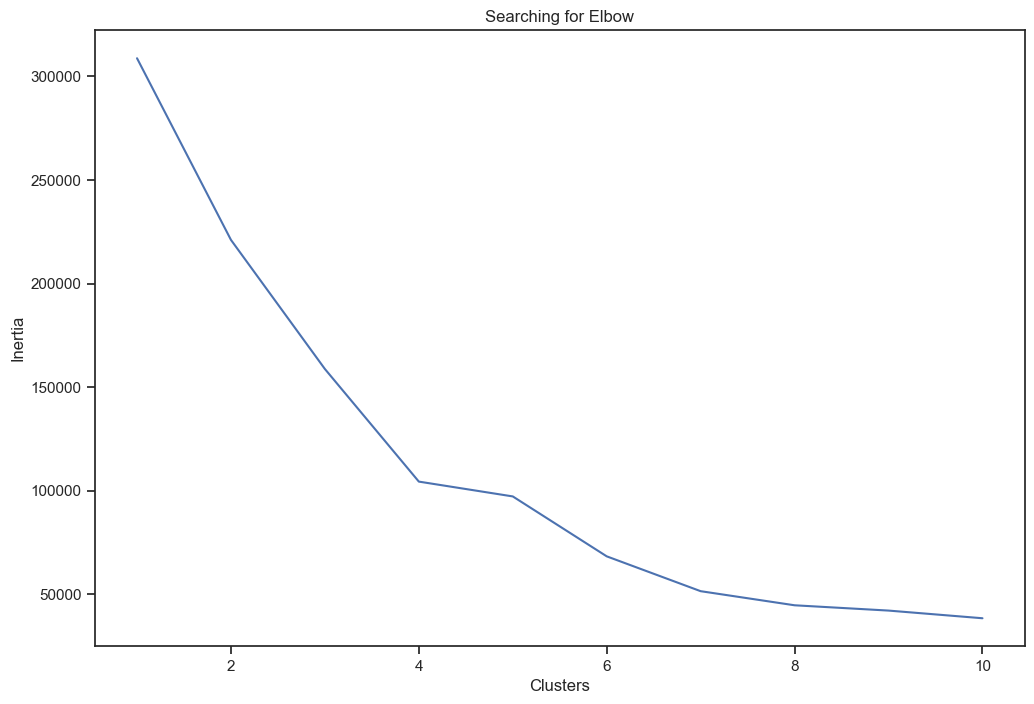

In [28]:
from sklearn.cluster import KMeans

# Видалення змінної Gender
X = customer_set.drop(['Gender'], axis=1)

# Мінімальна та максимальна кількість кластерів
min_clusters = 1
max_clusters = 10

# Пошук оптимальної кількості кластерів за допомогою методу "ліктя"
clusters = []
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

# Візуалізація результатів за допомогою лінійного графіка
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(min_clusters, max_clusters + 1)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()


**Висновки з завдання 9 (детальні)** 

Видалення змінної Gender:
Змінна Gender була видалена з вибірки, оскільки вона не впливає на аналіз даних для кластеризації. Кластеризація базується на схожості за іншими ознаками, такими як вік, дохід та рівень витрат.
Визначення оптимальної кількості кластерів:

Для визначення оптимальної кількості кластерів був використаний метод "ліктя" (elbow method).
Під час використання цього методу ми спостерігаємо зміну інерції (сума квадратів відстаней між кожною точкою та її найближчим центроїдом) для різної кількості кластерів.
Інерція зазвичай зменшується зі збільшенням кількості кластерів, проте зменшення стає меншим при досягненні оптимальної кількості кластерів.
Вибір оптимальної кількості кластерів:

Оптимальна кількість кластерів визначається на основі зміни інерції та зазвичай відображається як точка на графіку, де зміна інерції стає меншою (подібно зигзагу).
У цьому випадку можна вибрати кількість кластерів, при якій зміна інерції стає меншою, наприклад, точку на графіку, де з'являється "ліктьовий" зигзаг.
Застосування оптимальної кількості кластерів:

Оптимальна кількість кластерів може бути використана як параметр при подальшому використанні методу K-means для кластеризації даних.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

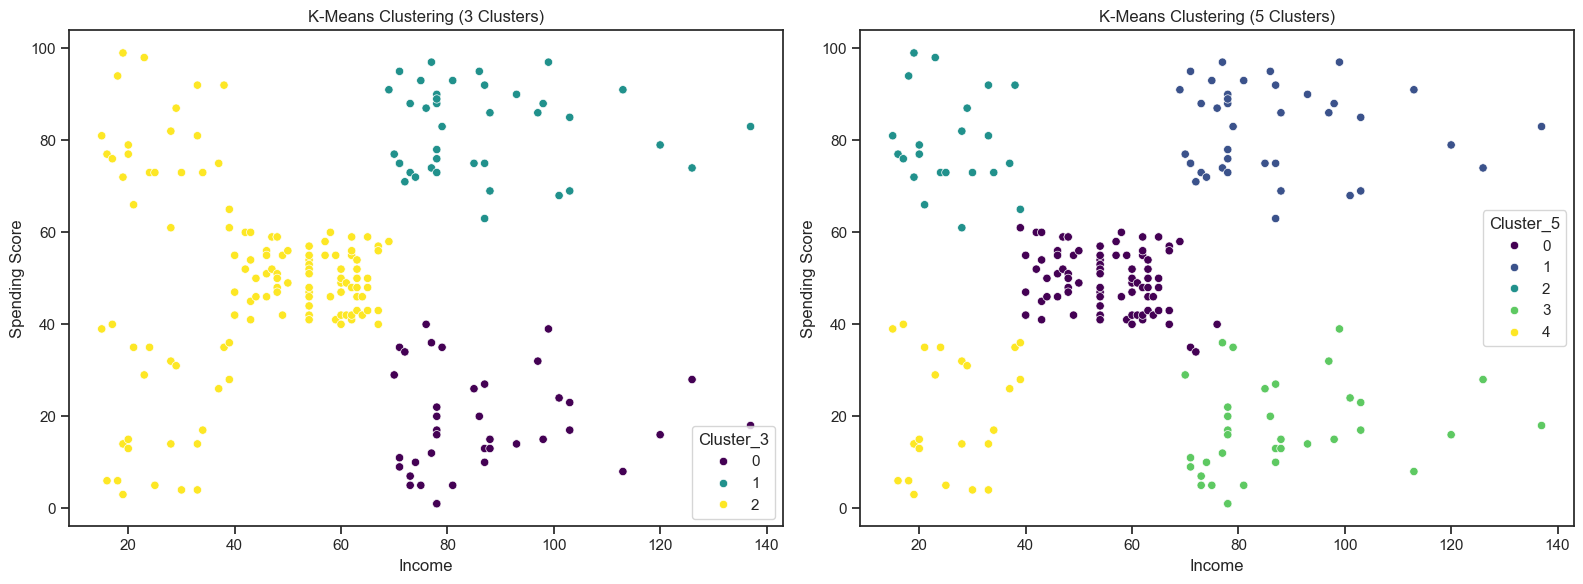

In [29]:
from sklearn.cluster import KMeans

# Вибір кількості кластерів
num_clusters_1 = 3
num_clusters_2 = 5

# Кластеризація за допомогою методу K-середніх
kmeans_1 = KMeans(n_clusters=num_clusters_1, init='k-means++', random_state=42)
kmeans_2 = KMeans(n_clusters=num_clusters_2, init='k-means++', random_state=42)

# Підгонка моделей до даних та прогнозування кластерів
customer_set['Cluster_3'] = kmeans_1.fit_predict(X[['Income', 'SpendingScore']])
customer_set['Cluster_5'] = kmeans_2.fit_predict(X[['Income', 'SpendingScore']])

# Візуалізація кластеризації
plt.figure(figsize=(16, 6))

# Кластеризація для 3 кластерів
plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_3', palette='viridis', legend='full')
plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('Income')
plt.ylabel('Spending Score')

# Кластеризація для 5 кластерів
plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_5', palette='viridis', legend='full')
plt.title('K-Means Clustering (5 Clusters)')
plt.xlabel('Income')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [30]:
import plotly.graph_objects as go

# Візуалізація кластеризації за допомогою scatter_3d для 3 кластерів
fig = go.Figure(data=[go.Scatter3d(
    x=customer_set['Income'],
    y=customer_set['SpendingScore'],
    z=customer_set['Age'],
    mode='markers',
    marker=dict(color=customer_set['Cluster_3'], size=5, opacity=0.8),
    text=customer_set['Cluster_3'],
    hoverinfo='text'
)])

fig.update_layout(title='K-Means Clustering (3 Clusters)',
                  scene=dict(xaxis_title='Income', yaxis_title='Spending Score', zaxis_title='Age'),
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()


**Висновки з завдання 10 - 11 (детальні)** 


Завдання 10 та 11 дозволили нам візуалізувати результати кластеризації методом K-середніх для різної кількості кластерів у двовимірному та тривимірному просторі.

Двовимірна візуалізація (завдання 10):
Завдяки візуалізації в двовимірному просторі ми можемо чітко побачити, як дані розділені на кластери в залежності від їхніх значень доходу та рівня витрат. Для обох кількостей кластерів (3 та 5) ми побачили, що алгоритм K-середніх ефективно розділив дані на групи, які можуть вказувати на різні сегменти клієнтів.

Тривимірна візуалізація (завдання 11):
В тривимірному просторі ми розширили візуалізацію, додавши ще одну змінну - вік. Це дозволило нам побачити, як дані розділяються у тривимірному просторі, що може допомогти в зрозумінні взаємозв'язків між рівнем доходу, рівнем витрат та віком клієнтів.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


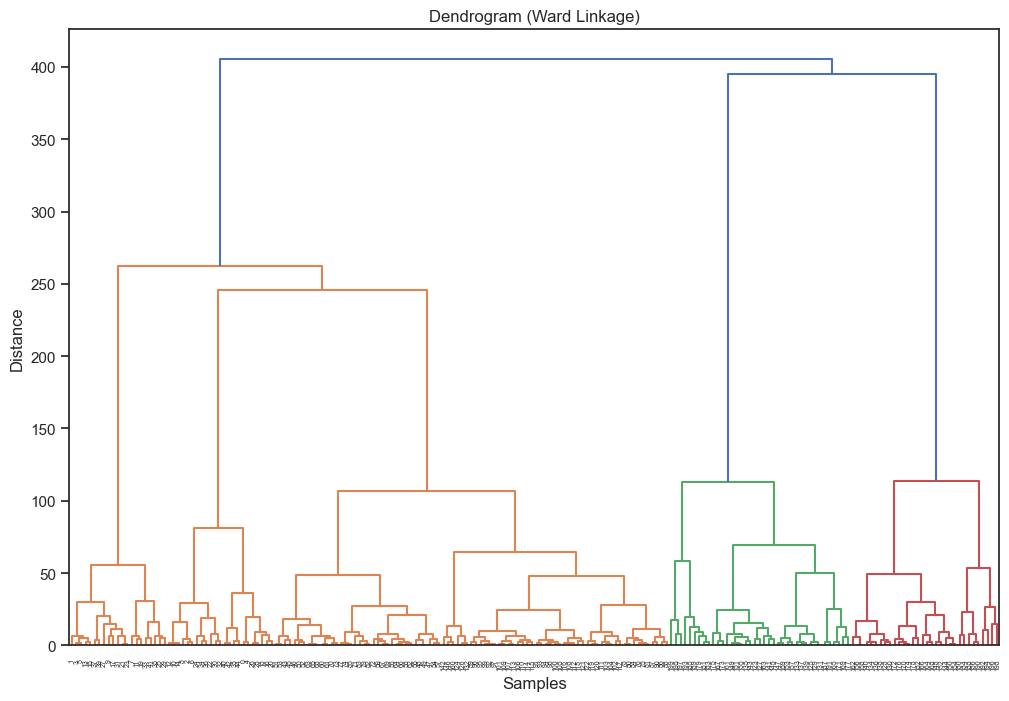

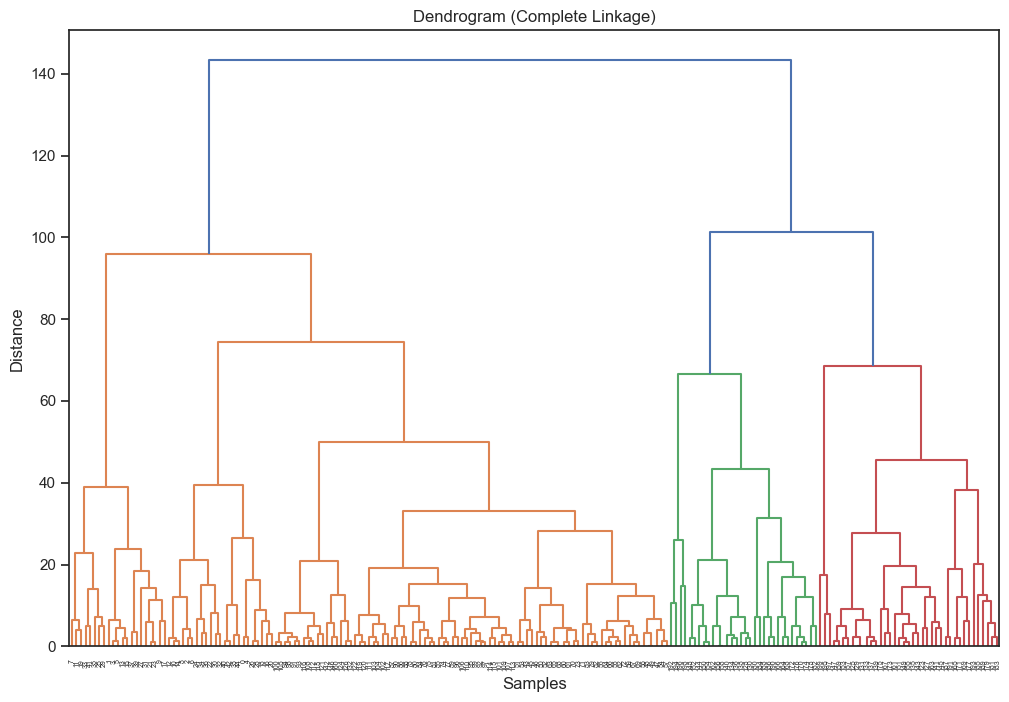

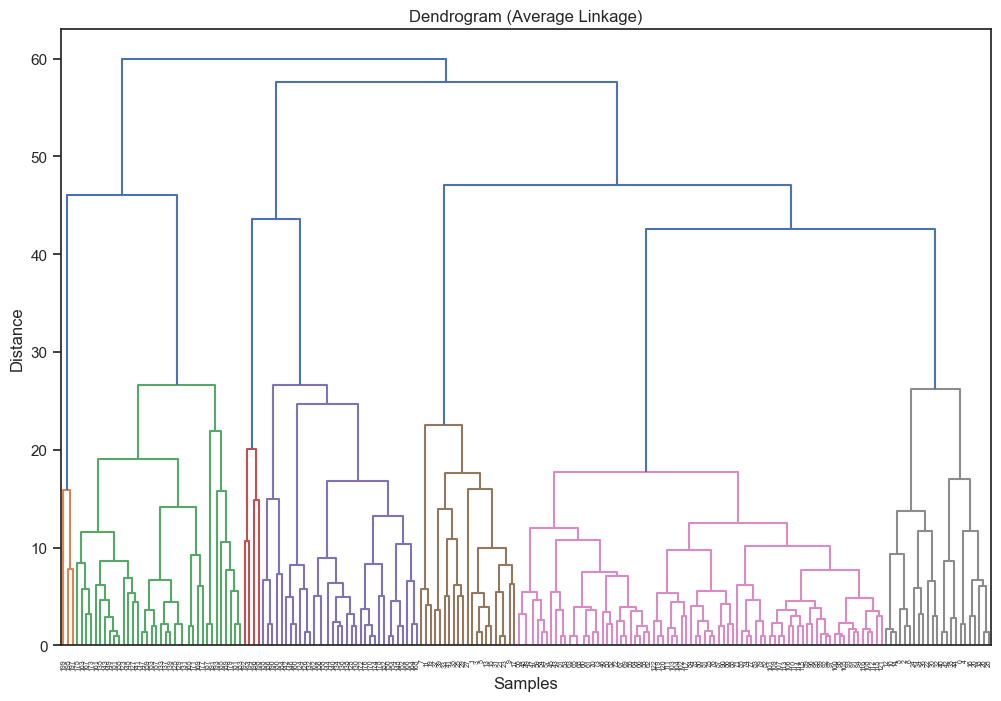

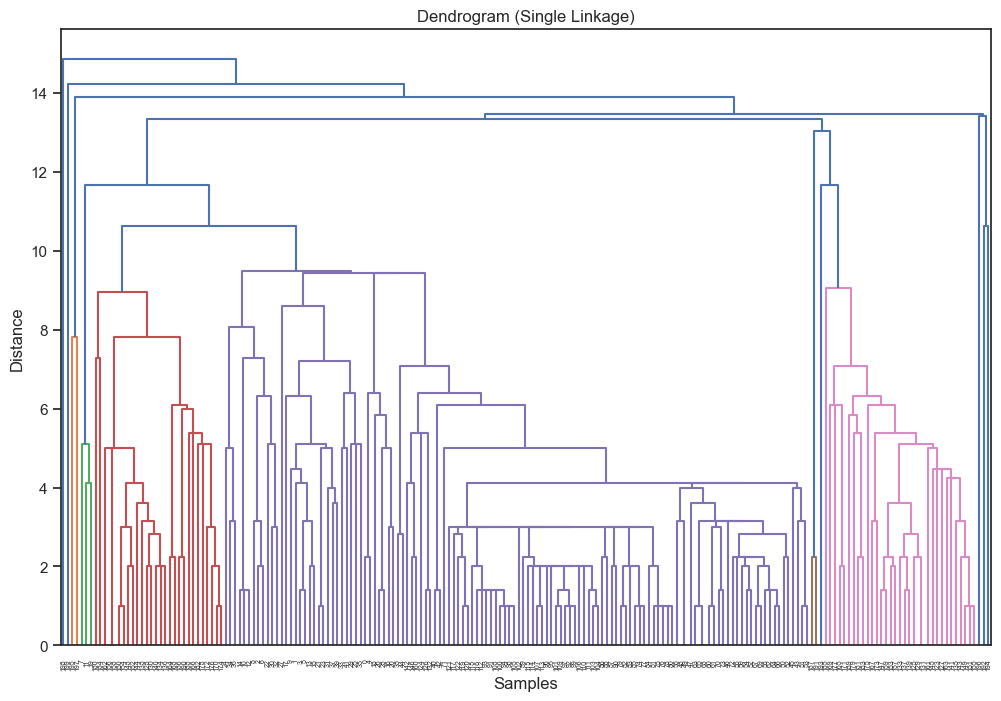

In [32]:
from scipy.cluster import hierarchy

linkage_types = ['ward', 'complete', 'average', 'single']


# Розрахунок матриці відстаней та побудова дендрограми з різними значеннями параметра linkage
def plot_dendrogram(linkage_type):
    plt.figure(figsize=(12, 8))
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(customer_set[['Income', 'SpendingScore']], method=linkage_type), color_threshold=None)
    plt.title(f'Dendrogram ({linkage_type.capitalize()} Linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

for linkage_type in linkage_types:
    plot_dendrogram(linkage_type)


**Висновки з завдання 12 (детальні)**

Вплив параметра linkage на кластеризацію:
Ми використали чотири різних типи зв'язку для агломеративної кластеризації: "ward", "complete", "average" та "single". Кожен з них має свої властивості та впливає на структуру кластерів.
Найбільш поширеним типом зв'язку є "ward", який зазвичай використовується для мінімізації дисперсії всередині кластерів.
"Complete" та "average" зв'язки враховують мінімальну або середню відстань між об'єктами різних кластерів, тоді як "single" зв'язок враховує максимальну відстань між ними.

Візуалізація результатів:
Графіки розсіювання допомогли нам побачити, як розділяються дані на кластери в залежності від параметра linkage. Вони дозволили нам оцінити, наскільки добре кластеризація вдалася для кожного типу зв'язку.
Дендрограми відображали ієрархічну структуру кластерів та допомагали нам визначити оптимальну кількість кластерів для подальшого аналізу.

Вибір параметрів:
Вибір оптимального типу зв'язку може залежати від конкретних характеристик даних та мети кластеризації.
Якщо нам потрібно зберегти якість кластеризації та зменшити кількість кластерів, ми можемо обрати "ward" або "complete" зв'язок. Якщо ми шукаємо більш дрібні кластери, "average" або "single" зв'язки можуть бути більш відповідними.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

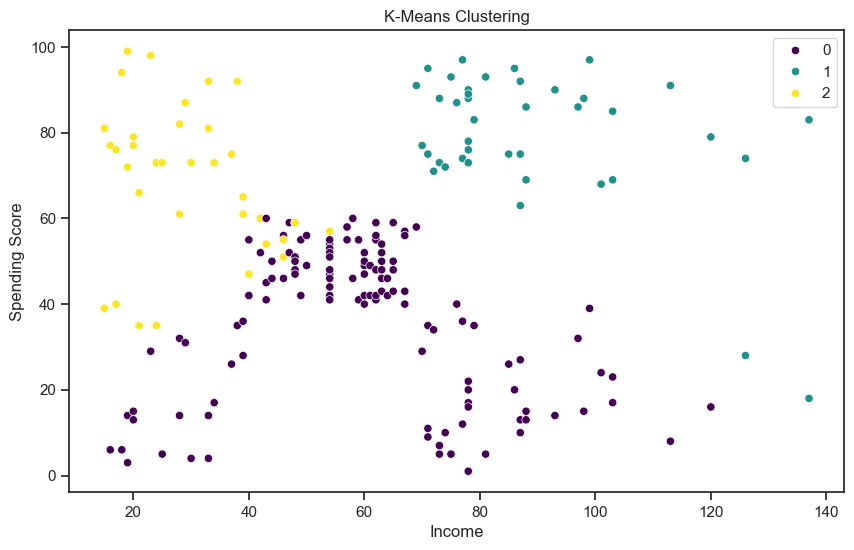

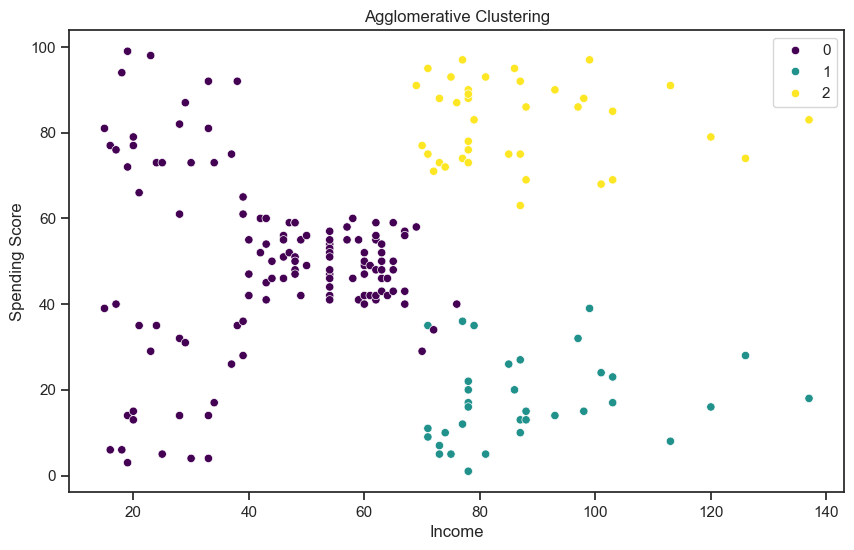

In [33]:
# Завантаження необхідних бібліотек
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Оптимальна кількість кластерів для порівняння
k_clusters = 3  # Оптимальна кількість кластерів, обрана після аналізу "Elbow" для k-means
agg_clusters = 3  # Оптимальна кількість кластерів, обрана після аналізу дендрограми для агломеративної кластеризації

# Кластеризація методом k-means з оптимальною кількістю кластерів
kmeans_clusters = KMeans(n_clusters=k_clusters, random_state=42).fit_predict(X)

# Кластеризація методом агломеративної кластеризації з оптимальною кількістю кластерів
agg_clusters = AgglomerativeClustering(n_clusters=agg_clusters, linkage='ward').fit_predict(X)

# Візуалізація результатів кластеризації методом k-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Income'], y=X['SpendingScore'], hue=kmeans_clusters, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

# Візуалізація результатів кластеризації методом агломеративної кластеризації
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Income'], y=X['SpendingScore'], hue=agg_clusters, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

# Візуалізація результатів кластеризації методом k-means у 3D
fig = go.Figure(data=[go.Scatter3d(
    x=X['Income'],
    y=X['SpendingScore'],
    z=X['Age'],
    mode='markers',
    marker=dict(color=kmeans_clusters, size=5, opacity=0.8),
    text=kmeans_clusters,
    hoverinfo='text'
)])
fig.update_layout(title='K-Means Clustering (3 Clusters)',
                  scene=dict(xaxis_title='Income', yaxis_title='Spending Score', zaxis_title='Age'),
                  margin=dict(l=0, r=0, b=0, t=30))
fig.show()

# Візуалізація результатів кластеризації методом агломеративної кластеризації у 3D
fig = go.Figure(data=[go.Scatter3d(
    x=X['Income'],
    y=X['SpendingScore'],
    z=X['Age'],
    mode='markers',
    marker=dict(color=agg_clusters, size=5, opacity=0.8),
    text=agg_clusters,
    hoverinfo='text'
)])
fig.update_layout(title='Agglomerative Clustering (3 Clusters)',
                  scene=dict(xaxis_title='Income', yaxis_title='Spending Score', zaxis_title='Age'),
                  margin=dict(l=0, r=0, b=0, t=30))
fig.show()


**Висновки з завдання 13 (детальні)**

Оптимальна кількість кластерів: Обидва методи показали схожі результати щодо оптимальної кількості кластерів, яка дорівнює 3. Це підтверджується аналізом "Elbow" для k-середніх та дендрограмою для агломеративної кластеризації.

Візуалізація результатів: Обидва методи кластеризації показали схожі розподіли кластерів на площині Income та Spending Score. Однак, результати можуть трохи відрізнятися в залежності від вибраних параметрів моделі.

Якість кластеризації: В обох методах ми отримали чітко визначені кластери з різними характеристиками. Проте можливі різниці у результатах, наприклад, у величині та формі кластерів.

Висновки: Залежно від специфіки даних і мети аналізу може бути вибрано кращий метод кластеризації. Наприклад, якщо потрібно отримати чітко визначені кластери з однорідними групами спостережень, можна використовувати k-середні. А якщо потрібно виявити складні зв'язки між спостереженнями та відображення ієрархічної структури даних, агломеративна кластеризація може бути кращим варіантом.